In [198]:
%matplotlib inline

import pandas as pd
import numpy as np
from utility_functions import report

# sklearn modules
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

import plotly.express as px
import matplotlib.pyplot as plt

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

 _______________________________________________
# Years of Rock Classification - 2008 to 2015
## # echonest audio features + duration and listens
 _______________________________________________
### 1. Preprocessing

In [199]:
# load data
rock_df = pd.read_csv('/Users/gaetanoantonicchio/Documents/GitHub/DataMining-2/src/Data (cleaned)/Datasets/rock_year_df.csv')
rock_df.set_index('track_id', inplace=True)
rock_df.drop('genre_top',axis=1, inplace=True)
rock_df.drop('name',axis=1, inplace=True)

rock_df.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,listens,duration,bit_rate,comments,year,song_hotttnesss,artist_hotttnesss,artist_familiarity
track_id,,,,,,,,,,,,,,,,
153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,424,405,256000,0,2008,0.044300,0.274455,0.173315
154,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632,205,319,256000,0,2008,0.070213,0.274455,0.173315
155,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325,197,756,192000,0,2008,0.000000,0.274455,0.173315
169,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347,270,144,192000,0,2008,0.039431,0.287989,0.162622
170,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548,122,181,192000,0,2008,0.000000,0.287989,0.162622


In [200]:
rock_df.year.value_counts()

2009    1036
2008    1005
2010     687
2011     606
2012     213
2013     142
2014     132
2015      71
Name: year, dtype: int64

In [201]:
rock_df.shape

(3892, 16)

In [202]:
pd.concat([rock_df.year.value_counts(),
                round(rock_df.year.value_counts(normalize=True).mul(100),2)],axis=1, keys=('counts','percentage (%)'))

,counts,percentage (%)
2009,1036,26.62
2008,1005,25.82
2010,687,17.65
2011,606,15.57
2012,213,5.47
2013,142,3.65
2014,132,3.39
2015,71,1.82


In [203]:
rock_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3892 entries, 153 to 124186
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acousticness        3892 non-null   float64
 1   danceability        3892 non-null   float64
 2   energy              3892 non-null   float64
 3   instrumentalness    3892 non-null   float64
 4   liveness            3892 non-null   float64
 5   speechiness         3892 non-null   float64
 6   tempo               3892 non-null   float64
 7   valence             3892 non-null   float64
 8   listens             3892 non-null   int64  
 9   duration            3892 non-null   int64  
 10  bit_rate            3892 non-null   int64  
 11  comments            3892 non-null   int64  
 12  year                3892 non-null   int64  
 13  song_hotttnesss     3892 non-null   float64
 14  artist_hotttnesss   3892 non-null   float64
 15  artist_familiarity  3892 non-null   float64
dtypes:

In [204]:
# convert year from integer to string
rock_df.year = rock_df.year.astype(str)

In [205]:
rock_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3892 entries, 153 to 124186
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acousticness        3892 non-null   float64
 1   danceability        3892 non-null   float64
 2   energy              3892 non-null   float64
 3   instrumentalness    3892 non-null   float64
 4   liveness            3892 non-null   float64
 5   speechiness         3892 non-null   float64
 6   tempo               3892 non-null   float64
 7   valence             3892 non-null   float64
 8   listens             3892 non-null   int64  
 9   duration            3892 non-null   int64  
 10  bit_rate            3892 non-null   int64  
 11  comments            3892 non-null   int64  
 12  year                3892 non-null   object 
 13  song_hotttnesss     3892 non-null   float64
 14  artist_hotttnesss   3892 non-null   float64
 15  artist_familiarity  3892 non-null   float64
dtypes:

In [206]:
# encoding labels
le = preprocessing.LabelEncoder()
rock_df['year'] = le.fit_transform(rock_df['year'])
rock_df.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,listens,duration,bit_rate,comments,year,song_hotttnesss,artist_hotttnesss,artist_familiarity
track_id,,,,,,,,,,,,,,,,
153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,424,405,256000,0,0,0.044300,0.274455,0.173315
154,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632,205,319,256000,0,0,0.070213,0.274455,0.173315
155,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325,197,756,192000,0,0,0.000000,0.274455,0.173315
169,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347,270,144,192000,0,0,0.039431,0.287989,0.162622
170,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548,122,181,192000,0,0,0.000000,0.287989,0.162622


In [207]:
print('Legend:\n0: 2008\n1: 2009\n2: 2010\n3: 2011\n4: 2012\n5: 2013 \n6: 2014\n7: 2015')
rock_df.year.value_counts()

Legend:
0: 2008
1: 2009
2: 2010
3: 2011
4: 2012
5: 2013 
6: 2014
7: 2015


1    1036
0    1005
2     687
3     606
4     213
5     142
6     132
7      71
Name: year, dtype: int64

In [208]:
# detach target col
labels = rock_df[['year']]
labels.reset_index(drop=True, inplace=True)
labels = labels['year']

In [209]:
le.inverse_transform(labels)

array(['2008', '2008', '2008', ..., '2015', '2015', '2015'], dtype=object)

In [210]:
# remove labels from dataframe
rock_df.drop('year', axis=1, inplace=True)

In [211]:
# normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(rock_df)

# 2. PCA on normalized data (scaled_features)
## 2.1 Determine optimal number of components
### a) scree-plot

Text(0.5, 0, 'Principal Component #')

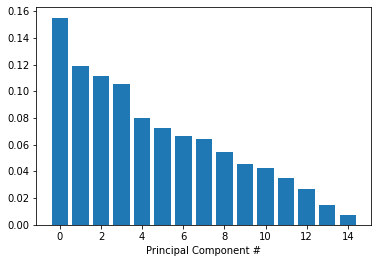

In [212]:
pca = PCA()
pca.fit(scaled_features)
# get explained variance ratios from PCA using all features
exp_variance = pca.explained_variance_ratio_
# plot explained variance
fig, ax= plt.subplots()
ax.bar(range(pca.n_components_),exp_variance)
ax.set_xlabel('Principal Component #')

### b) cumulative explained variance plot

Optimal number of components: 10
Explained variation per principal component:
[0.15504192 0.11892485 0.11176005 0.10506332 0.08013783 0.0726367
 0.06617729 0.06392912 0.05464662 0.04545203 0.04255065 0.034902
 0.02661873 0.01467805 0.00748082]


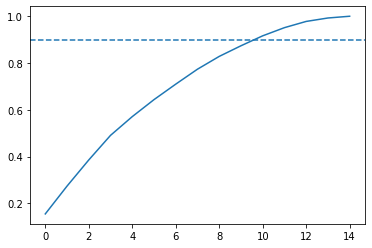

In [213]:
# calculate the cumulative explained variance
cum_exp_var = np.cumsum(exp_variance)

# plot the cumulative explained variance and draw a dashed line at 0.9\
# This line indicates how much variance (information) we want to retain
fig, ax= plt.subplots()
ax.plot(cum_exp_var)
ax.axhline(y=0.9, linestyle='--')

# find index where cum_exp_var exceeds 0.9 and adding 1 to that index to get the num of components
n_components = ((np.where(cum_exp_var > 0.9))[0][0])
print(f"Optimal number of components: {n_components}")
print(f"Explained variation per principal component:\n{pca.explained_variance_ratio_}")
# perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components,random_state=42)
pca.fit(scaled_features)
pca_proj = pca.transform(scaled_features)

## 2.2 Plot PCA in 2D

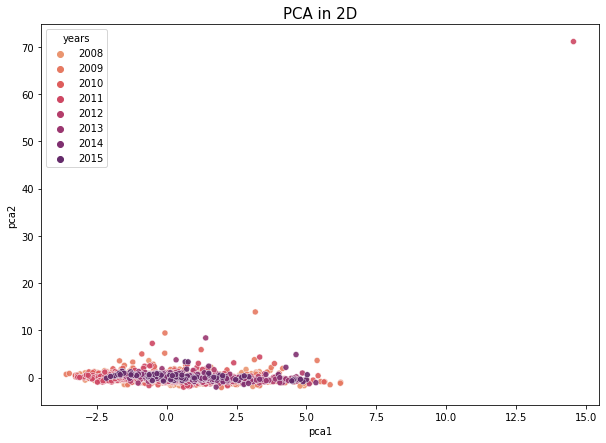

In [214]:
# generating df for plotting PCA
df = pd.DataFrame()
df['pca1'] = pca_proj[:,0]
df['pca2'] = pca_proj[:,1]
df['pca3'] = pca_proj[:,2]
df['years'] = le.inverse_transform(labels)

# plot scatter of PCA
plt.figure(figsize=(10,7))
sns.scatterplot(
    x="pca1", y="pca2",
    hue='years',
    palette = 'flare',
    data=df,
    legend='full',
    alpha=0.9
)
plt.title("PCA in 2D", fontsize= 15)
plt.show()

### 2.3 Plot PCA in 3D

In [215]:
# 3D PCA
#total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
    df, x='pca1', y='pca2', z='pca3', color='years',
    #title=f'Total Explained Variance: {total_var:.2f}%',
    #labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.update_layout(legend=dict(
    orientation="v",
    yanchor="bottom",
    y=1,
    xanchor="right",
    x=0.6
),width=700, height=700, scene_camera_eye_z=0.8)
fig.show()


# 3. Split data for classification

In [216]:
# shuffle and split into development set and internal test set:
# (PCA)
Xpca_develop, Xpca_test, y_develop_pca, y_test_pca = train_test_split(
pca_proj, labels, test_size=0.30, random_state=42, stratify=labels)

# (split without PCA)
X_develop, X_test, y_develop, y_test = train_test_split(
scaled_features, labels, test_size=0.30, random_state=42,stratify= labels)

In [217]:
# check partitions
print(f"Legend:\n0: 2008\n1: 2009\n2: 2010\n3: 2011\n4: 2012\n5: 2013 \n6: 2014\n7: 2015\n\n\
***PCA***\nDevelopment set:\n{y_develop_pca.value_counts()}\n\nInternal Test:\
\n{y_test_pca.value_counts()}\n\n\-----------------\n\***No-PCA***\nDevelopment set:\n{y_develop.value_counts()}\n\nInternal Test:\n{y_test.value_counts()}")

Legend:
0: 2008
1: 2009
2: 2010
3: 2011
4: 2012
5: 2013 
6: 2014
7: 2015

***PCA***
Development set:
1    725
0    704
2    481
3    424
4    149
5     99
6     92
7     50
Name: year, dtype: int64

Internal Test:
1    311
0    301
2    206
3    182
4     64
5     43
6     40
7     21
Name: year, dtype: int64

\-----------------
\***No-PCA***
Development set:
1    725
0    704
2    481
3    424
4    149
5     99
6     92
7     50
Name: year, dtype: int64

Internal Test:
1    311
0    301
2    206
3    182
4     64
5     43
6     40
7     21
Name: year, dtype: int64


# 4. Decision Tree
### a) Unbalanced - without PCA

#### - Validation Schema: coarse grid-search with 5 fold CV
We adopt a 10 fold cross validation repeated 10 times and then averaged, in order to reduce the variance of the model.

In [218]:
# search parameters
param_grid = {
               "max_depth": [3,4,5,6,7,8,9,10,15],
               "min_samples_leaf": [25,20,35,40,45,50,55,75],
               "criterion": ["gini", "entropy"]
             }
# instantiate a model
dtc = DecisionTreeClassifier()
rep_kfold = RepeatedKFold(n_splits=5, n_repeats=5, random_state=2652124)
clf = GridSearchCV(dtc, cv =rep_kfold , param_grid=param_grid, n_jobs=2, verbose=True)
clf.fit(X_develop, y_develop)
# display top 3 models
print(f"best parameters:\n{clf.best_params_}\naccuracy: {clf.best_score_}")
report(clf.cv_results_)

Fitting 25 folds for each of 144 candidates, totalling 3600 fits
best parameters:
{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 20}
accuracy: 0.4696095520777119
Model with rank: 1
Mean validation score: 0.470 (std: 0.029)
Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 20}

Model with rank: 2
Mean validation score: 0.459 (std: 0.026)
Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 25}

Model with rank: 3
Mean validation score: 0.456 (std: 0.028)
Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20}



#### - Train and predict
The model is retrained on the full development set.

The prediction will be saved as:
- y_pred_dtc

The roc curve will be saved as:
- roc_auc0

The false and true positive rates will be saved as:
- fpr0
- tpr0

In [219]:
# train and fit
dtc = DecisionTreeClassifier(criterion= 'gini',max_depth=5, min_samples_leaf= 55)
dtc.fit(X_develop,y_develop)
# predict on internal test set
y_pred_dtc = dtc.predict(X_test)

# display metrics
print('Accuracy %s' % accuracy_score(y_test, y_pred_dtc))
print('F1-score %s' % f1_score(y_test, y_pred_dtc, average=None))
print(classification_report(y_test, y_pred_dtc))

Accuracy 0.3681506849315068
F1-score [0.48888889 0.44097561 0.19548872 0.1038961  0.33333333 0.
 0.31111111 0.        ]
              precision    recall  f1-score   support

           0       0.55      0.44      0.49       301
           1       0.32      0.73      0.44       311
           2       0.43      0.13      0.20       206
           3       0.24      0.07      0.10       182
           4       0.36      0.31      0.33        64
           5       0.00      0.00      0.00        43
           6       0.28      0.35      0.31        40
           7       0.00      0.00      0.00        21

    accuracy                           0.37      1168
   macro avg       0.27      0.25      0.23      1168
weighted avg       0.37      0.37      0.32      1168



#### Confusion Matrix

[[132 152   3  10   4   0   0   0]
 [ 52 226  14  11   2   0   6   0]
 [ 29 136  26   9   3   0   3   0]
 [ 19 123  14  12  11   0   3   0]
 [  2  32   2   1  20   0   7   0]
 [  1  11   0   4  13   0  14   0]
 [  2  22   0   1   1   0  14   0]
 [  2  12   1   1   2   0   3   0]]


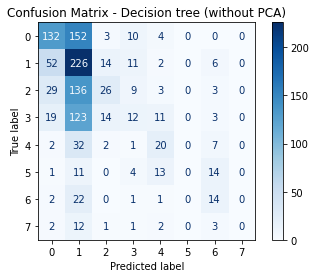

In [220]:
# confusion matrix - Internal Test

cm = plot_confusion_matrix(dtc,X_test,y_test,
                            cmap = plt.cm.Blues)
cm.ax_.set_title('Confusion Matrix - Decision tree (without PCA)')
print(cm.confusion_matrix)
plt.show()

### b) Unbalanced - with PCA
#### Validation schema:  repeated 5 fold cross validation - grid search

In [221]:
# model
dtc_pca = DecisionTreeClassifier()
rep_kfold = RepeatedKFold(n_splits=5, n_repeats=5, random_state=2652124)
clf = GridSearchCV(dtc, cv =rep_kfold , param_grid=param_grid, n_jobs=2, verbose=True)

clf.fit(Xpca_develop, y_develop_pca)
print(f"best parameters:\n{clf.best_params_}\naccuracy: {clf.best_score_}")

report(clf.cv_results_)

Fitting 25 folds for each of 144 candidates, totalling 3600 fits
best parameters:
{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 20}
accuracy: 0.3515415542363735
Model with rank: 1
Mean validation score: 0.352 (std: 0.020)
Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 20}

Model with rank: 2
Mean validation score: 0.351 (std: 0.018)
Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20}

Model with rank: 3
Mean validation score: 0.351 (std: 0.019)
Parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 20}



#### - Train and predict
The model is retrained on the full development set.

The prediction will be saved as:
- y_pred_dtc_pca

The roc curve will be saved as:
- roc_auc1

The false and true positive rates will be saved as:
- fpr1
- tpr1

In [222]:
dtc_pca = DecisionTreeClassifier(criterion= 'gini',max_depth=4, min_samples_leaf= 75)
dtc_pca.fit(Xpca_develop,y_develop_pca)

y_pred_dtc_pca = dtc_pca.predict(Xpca_test)

print('Accuracy %s' % accuracy_score(y_test_pca, y_pred_dtc_pca))
print('F1-score %s' % f1_score(y_test_pca, y_pred_dtc_pca, average=None))
print(classification_report(y_test_pca, y_pred_dtc_pca))

Accuracy 0.3356164383561644
F1-score [0.35744681 0.43915828 0.13636364 0.21052632 0.33333333 0.
 0.         0.        ]
              precision    recall  f1-score   support

           0       0.50      0.28      0.36       301
           1       0.31      0.77      0.44       311
           2       0.31      0.09      0.14       206
           3       0.29      0.16      0.21       182
           4       0.36      0.31      0.33        64
           5       0.00      0.00      0.00        43
           6       0.00      0.00      0.00        40
           7       0.00      0.00      0.00        21

    accuracy                           0.34      1168
   macro avg       0.22      0.20      0.18      1168
weighted avg       0.33      0.34      0.28      1168



#### Confusion matrix

[[ 84 185  19  11   2   0   0   0]
 [ 45 240  11  13   2   0   0   0]
 [ 13 149  18  21   5   0   0   0]
 [ 26 108  10  30   8   0   0   0]
 [  1  31   0  12  20   0   0   0]
 [  0  28   0   6   9   0   0   0]
 [  0  26   0   8   6   0   0   0]
 [  0  15   0   2   4   0   0   0]]


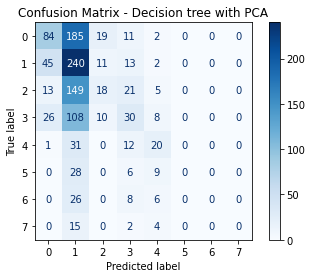

In [223]:
# confusion matrix Decision tree with PCA
cm_pca = plot_confusion_matrix(dtc_pca,Xpca_test,y_test_pca,
                            cmap = plt.cm.Blues)
cm_pca.ax_.set_title('Confusion Matrix - Decision tree with PCA')
print(cm_pca.confusion_matrix)
plt.show()

# 5. KNN
### a) Unbalanced - without PCA

#### Validation schema: coarse grid search with repeated 5 fold cross validation

In [224]:
# range of k to try - find a good range of k
k_range = {"n_neighbors":[x for x in range(2, 50)]}

knn = KNeighborsClassifier()
rep_kfold = RepeatedKFold(n_splits=5, n_repeats=2, random_state=2652124)
clf = GridSearchCV(knn, param_grid= k_range, cv=rep_kfold )
clf.fit(X_develop, y_develop)
print(f"best parameters:\n{clf.best_params_}\naccuracy: {clf.best_score_}")

#report(clf.cv_results_)

best parameters:
{'n_neighbors': 5}
accuracy: 0.4548431597409607


#### Train and predict

In [230]:
knn =  KNeighborsClassifier(n_neighbors = 5)
# retrain knn on the whole development set
knn.fit(X_develop, y_develop)
# predict target variable
y_pred_knn0 = knn.predict(X_test)

# display classification report
print(classification_report(y_test, y_pred_knn0))

              precision    recall  f1-score   support

           0       0.49      0.66      0.57       301
           1       0.46      0.51      0.48       311
           2       0.48      0.38      0.42       206
           3       0.38      0.29      0.33       182
           4       0.48      0.42      0.45        64
           5       0.51      0.47      0.49        43
           6       0.47      0.17      0.25        40
           7       0.40      0.10      0.15        21

    accuracy                           0.47      1168
   macro avg       0.46      0.37      0.39      1168
weighted avg       0.46      0.47      0.45      1168



#### Confusion matrix

[[207  76   8   9   1   0   0   0]
 [133 141  13  16   5   2   1   0]
 [ 71  87  33   7   6   2   0   0]
 [ 57  68  19  31   4   3   0   0]
 [  6  14   2  15  23   3   1   0]
 [  3   6   0  14  14   6   0   0]
 [  4  13   3   7  12   0   1   0]
 [  4   8   0   3   5   0   1   0]]


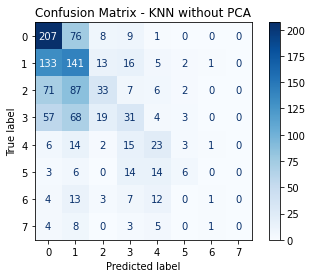

In [226]:
# confusion matrix KNN - Internal test
cm_knn = plot_confusion_matrix(knn,X_test,y_test,
                            cmap = plt.cm.Blues)
cm_knn.ax_.set_title('Confusion Matrix - KNN without PCA')
print(cm_knn.confusion_matrix)
plt.show()

### b) Unbalanced - with PCA

#### Validation schema: coarse grid search with repeated 5 fold cross validation

In [227]:
# range of k to try - find a good range of k
k_range = {"n_neighbors":[x for x in range(2, 50)]}

knn = KNeighborsClassifier()
rep_kfold = RepeatedKFold(n_splits=5, n_repeats=2, random_state=2652124)
clf = GridSearchCV(knn, param_grid= k_range, cv=rep_kfold )
clf.fit(Xpca_develop, y_develop_pca)
print(f"best parameters:\n{clf.best_params_}\naccuracy: {clf.best_score_}")

#report(clf.cv_results_)

best parameters:
{'n_neighbors': 7}
accuracy: 0.4133600917431193


#### Train and predict

In [231]:
knn_pca =  KNeighborsClassifier(n_neighbors = 7)
# retrain knn on the whole development set
knn_pca.fit(Xpca_develop, y_develop_pca)
# predict target variable
y_pred_knn1 = knn_pca.predict(Xpca_test)
# display classification report
print(classification_report(y_test_pca, y_pred_knn1))

              precision    recall  f1-score   support

           0       0.47      0.66      0.55       301
           1       0.43      0.48      0.45       311
           2       0.46      0.39      0.43       206
           3       0.31      0.23      0.26       182
           4       0.50      0.41      0.45        64
           5       0.50      0.35      0.41        43
           6       0.50      0.15      0.23        40
           7       0.00      0.00      0.00        21

    accuracy                           0.44      1168
   macro avg       0.40      0.33      0.35      1168
weighted avg       0.43      0.44      0.42      1168



#### Confusion matrix

[[189  64  22  20   3   1   1   1]
 [ 95 143  34  25   6   2   5   1]
 [ 52  43  79  23   6   1   2   0]
 [ 43  53  22  53   5   4   1   1]
 [  6  10   4  13  25   4   2   0]
 [  3   5   3   7   7  14   2   2]
 [  6  11   3   5   3   2   9   1]
 [  4   5   0   7   0   2   1   2]]


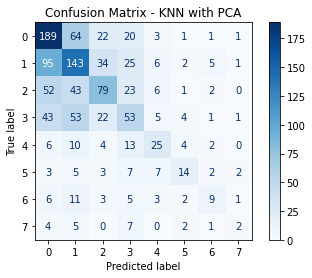

In [229]:
cm_knn_pca = plot_confusion_matrix(knn_pca,Xpca_test,y_test_pca,
                            cmap = plt.cm.Blues)
cm_knn_pca.ax_.set_title('Confusion Matrix - KNN with PCA')
print(cm_knn_pca.confusion_matrix)
plt.show()
